# Urban Growth Boundary (UGB)

In [16]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
#import API keys: 
from config import api_key

#save data in a CSV
output_file = "output_data/ugb.csv"


In [ ]:
# Start of code for Question 1: housing types

In [ ]:
# End of code for Question 1: housing types

In [ ]:
# Start of code for Question 2: public transportation

In [ ]:
# End of code for Question 2: public transportation

In [ ]:
# Start of code for Question 3: population growth

In [ ]:
# End of code for Question 3: population growth

In [ ]:
# Start of code for Question 4: population density

In [27]:
#format top 100 cities dataframe
populationcsv = "../UGB/top_100clean.csv"
population = pd.read_csv(populationcsv)
population = population.rename(columns = {"Persons by km2": "Persons per km2", "2010 Census": "Census Population"})
population.set_index('City', inplace=True)
population

,Rank,Census Population,State,Persons per km2,Latitude,Longitude
City,,,,,,
New York City,1,8175133,NY,13401.8,40.6943,-73.9249
Los Angeles,2,3792621,CA,3295.0,34.1139,-118.4068
Chicago,3,2695598,IL,4612.0,41.8373,-87.6862
Houston,4,2099451,TX,1401.0,29.7869,-95.3905
Phoenix,5,1445632,AZ,1212.0,33.5722,-112.0891
...,...,...,...,...,...,...
Fremont,96,214089,CA,1171.0,37.5265,-121.9852
Boise City,97,205671,ID,1045.0,43.6007,-116.2312
Richmond,98,204214,VA,1463.0,37.5295,-77.4756


In [25]:
#format ugb dataframe
ugb_cities = "../UGB/ugb_cities.csv"
ugb_df = pd.read_csv(ugb_cities)
ugb_df = ugb_df.rename(columns = {"Persons per km": "Persons per km2", "Population": "Census Population"})
ugb_df.set_index('City', inplace=True)
ugb_df

,Census Population,State,Persons per km2,Latitude,Longitude
City,,,,,
Lexington,295803,KY,438,38.0423,-84.4587
Seattle,608660,WA,3336,47.6211,-122.3244
St. Paul,285068,MN,2277,44.9477,-93.1040
Minneapolis,382578,MN,3019,44.9635,-93.2678
Virginia Beach,437994,VA,710,36.7335,-76.0435
San Jose,945942,CA,2257,37.3021,-121.8489
Honolulu,337256,HI,2234,21.3294,-157.8460
Portland,583776,OR,1874,45.5371,-122.6500
Miami,399457,FL,4969,25.7839,-80.2102


In [19]:
#set density variables
density = population["Persons per km2"]
ugb_density = ugb_df["Persons per km2"]

In [20]:
#summary statistics
ugb_density_mean = ugb_density.mean()
density_mean = density.mean()
ugb_density_median = ugb_density.median()
density_median = density.median()
min_dens = density.min()
max_dens = density.max()
min_ugb = ugb_density.min()
max_ugb = ugb_density.max()

In [21]:
#summary statistics dataframe
density_summary = pd.DataFrame({'Mean Density':[density_mean], 'Median Density': [density_median], "Minimun Density": [min_dens],
                                "Maximum Density": [max_dens]})
density_summary


,Mean Density,Median Density,Minimun Density,Maximum Density
0,1915.488,1386.0,66.0,13401.8


In [22]:
#summary stats for UGB cities
ugb_density_summary = pd.DataFrame({'UGB Mean Density':[ugb_density_mean], 'UGB Median Density': [ugb_density_median], 
                                    "UGB Minimun Density": [min_ugb], "UGB Maximum Density": [max_ugb]})
ugb_density_summary

,UGB Mean Density,UGB Median Density,UGB Minimun Density,UGB Maximum Density
0,2346.0,2257.0,438,4969


In [23]:
#comfigure gmaps
gmaps.configure(api_key=api_key)

In [28]:
#change data types to float
locations = population[["Latitude", "Longitude"]].astype(float)
ugb_locations =ugb_df[["Latitude", "Longitude"]].astype(float)
density= population["Persons per km2"].astype(float)
ugb_density = ugb_df["Persons per km2"].astype(float)

In [29]:
#heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=density, 
                                 dissipating=False, max_intensity=5000,
                                 point_radius = 1)

fig.add_layer(heat_layer)

In [30]:
#add ugb markers
ugb_layer = gmaps.symbol_layer(
    ugb_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=4)
    
fig = gmaps.figure()
fig.add_layer(ugb_layer)

In [31]:
#add layers and show figure
fig = gmaps.figure()
fig.add_layer(heat_layer)
fig.add_layer(ugb_layer)

fig

Figure(layout=FigureLayout(height='420px'))

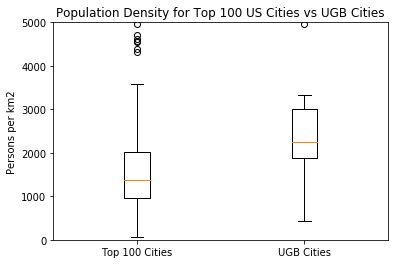

<Figure size 432x288 with 0 Axes>

In [32]:
#create boxplots
data = [density, ugb_density]
fig1, ax1 = plt.subplots()
ax1.set_title('Population Density for Top 100 US Cities vs UGB Cities')
ax1.set_ylabel('Persons per km2')
ax1.boxplot(data)
ax1.set_xticklabels(['Top 100 Cities', 'UGB Cities'])
top = 5000
bottom = 0
ax1.set_ylim(bottom, top)
plt.show()
plt.savefig("../UGB/PopD_boxplot.png")
plt.show()

In [33]:
#Top 100 cities quartiles and outliers
quartiles = density.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of population density is: {lowerq}")
print(f"The upper quartile of population density is: {upperq}")
print(f"The interquartile range of population density is: {iqr}")
print(f"The the median of population density is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of population density is: 951.5
The upper quartile of population density is: 2011.0
The interquartile range of population density is: 1059.5
The the median of population density is: 1386.0 
Values below -637.75 could be outliers.
Values above 3600.25 could be outliers.


In [34]:
#UGB cities quartiles and outliers
quartiles = ugb_density.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of UGB population density is: {lowerq}")
print(f"The upper quartile of UGB population density is: {upperq}")
print(f"The interquartile range of UGB population density is: {iqr}")
print(f"The the median of UGB population density is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of UGB population density is: 1874.0
The upper quartile of UGB population density is: 3019.0
The interquartile range of UGB population density is: 1145.0
The the median of UGB population density is: 2257.0 
Values below 156.5 could be outliers.
Values above 4736.5 could be outliers.


In [ ]:
# End of code for Question 4: population density